In [1]:
# sci python and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# model selection and performance
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2, f_classif
from sklearn.metrics import classification_report
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# decorations
from IPython.display import YouTubeVideo

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2)
import random
import seaborn as sns 

In [2]:
data = pd.read_csv("../../AnnotateData/recgli_annotation10_onlyGoodBiopsies_alt1.csv")
print("Your data has",data.shape[0], "rows, and ", data.shape[1], "columns")
data.head()


Your data has 366 rows, and  75 columns


,vialid,b_number,t_number_x,t_number_y,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,tumor_cell_evaluation,...,exclude_bc_pathology,include_diffu1000,include_diffu2000,exclude_histology,txe_comments,outcome,in_CEL,in_T2all,in_NEL,CELorNEL
0,1B82,4080.0,t10366,10366.0,10778.0,4/12/16,4/13/16,Treatment Effect,Treatment Effect,0,...,NaN,1,1,NaN,True,txe,0.0,1.0,1.0,NEL
1,4B82,4080.0,t10366,10366.0,10778.0,4/12/16,4/13/16,Treatment Effect,Treatment Effect,3,...,NaN,1,1,NaN,False,unk,0.0,1.0,1.0,NEL
2,29B82,3759.0,t10448,10448.0,10815.0,5/11/16,5/12/16,Grade III,Oligodendroglioma,3,...,NaN,1,1,NaN,False,rHGG,1.0,1.0,0.0,CEL
3,61B90,3990.0,t10594,10594.0,10839.0,6/5/16,6/6/16,Grade IV,Glioblastoma,0,...,NaN,1,1,NaN,NaN,txe,0.0,1.0,1.0,NEL
4,60B90,3990.0,t10594,10594.0,10839.0,6/5/16,6/6/16,Grade IV,Glioblastoma,2,...,NaN,1,1,NaN,NaN,rHGG,0.0,1.0,1.0,NEL


In [3]:
labels = data.outcome
data.shape

(366, 75)

In [4]:
data.columns

Index(['vialid', 'b_number', 't_number_x', 't_number_y', 'sf_number',
       'current_scan_date', 'current_surgery_date', 'current_hist_grade',
       'current_hist_type', 'tumor_cell_evaluation', 'necrosis',
       'mv_hyperplasia', 'mv_delicate_vasculature', 'f8_delicate', 'f8_simple',
       'f8_complex', 'mib_1', 'avgerage_cells', 'treatment_related_ab',
       'bx_pure_treatment_effect', 'percent_tumor_nuclei', 'nfl', 'nfse',
       'nt1c', 'nt1v', 'nt1d', 'nadc.1', 'nfa.1', 'nev1.1', 'nev2.1', 'nev3.1',
       'nevrad.1', 'nadc.2', 'nfa.2', 'nev1.2', 'nev2.2', 'nev3.2', 'nevrad.2',
       'cbvn_nlin', 'phn_nlin', 'recov_nlin', 'phn_npar', 'recov_npar',
       'recovn_npar', 'ccri', 'cni', 'crni', 'ncho', 'ncre', 'nnaa', 'nlac',
       'nlip', 'newdata', 'olddata', 'exclude_bc_hematoma_or_ventricle',
       'exclude_perf', 'nLL', 'comments', 'perf_quant', 'include_perf',
       'spec_quant', 'include_spec', 'diffu1000_quant', 'diffu2000_quant',
       'exclude_bc_anat', 'exclude_b

In [5]:
features = ['vialid', 't_number_y', 'nadc.1', 'nfa.1',
       'cbvn_nlin',
       'ccri', 'cni', 'ncho', 'ncre', 'nnaa', 'newdata', 'CELorNEL', 'outcome']

In [6]:
data = data[features]

In [7]:
data.head()

,vialid,t_number_y,nadc.1,nfa.1,cbvn_nlin,ccri,cni,ncho,ncre,nnaa,newdata,CELorNEL,outcome
0,1B82,10366.0,0.75,0.83,1.08,1.88,2.60,1.03,0.47,0.46,1,NEL,txe
1,4B82,10366.0,0.68,0.61,NaN,NaN,NaN,NaN,NaN,NaN,1,NEL,unk
2,29B82,10448.0,1.62,0.50,2.43,NaN,NaN,NaN,NaN,NaN,1,CEL,rHGG
3,61B90,10594.0,2.62,0.81,1.64,NaN,NaN,NaN,NaN,NaN,1,NEL,txe
4,60B90,10594.0,2.12,0.42,0.95,1.03,3.27,1.04,0.79,0.36,1,NEL,rHGG


In [8]:
data_cel = data.loc[data['CELorNEL'] == "CEL"]

In [9]:
data_nel = data.loc[data['CELorNEL'] == "NEL"]

In [10]:
data = data_cel.append(data_nel)

In [11]:
data.CELorNEL.value_counts()

CEL    201
NEL    155
Name: CELorNEL, dtype: int64

In [12]:
data.shape

(356, 13)

In [13]:
data.outcome.value_counts()

rHGG    222
txe      69
unk      65
Name: outcome, dtype: int64

In [13]:
data_txe = data.loc[data['outcome']=="txe"]
data_rHGG = data.loc[data['outcome']=="rHGG"]

In [14]:
data = data_txe.append(data_rHGG)

In [15]:
data.shape

(291, 13)

## Encode for missingness: 

In [16]:
data['hasDiffu'] = [0 if x else 1 for x in data['nadc.1'].isnull()]
data['hasPerf'] = [0 if x else 1 for x in data['cbvn_nlin'].isnull() ]
data['hasSpec'] = [0 if x else 1 for x in data['cni'].isnull() ]

## adding in the CEL, outcome yes/no binary 

In [17]:
data['in_CEL'] = pd.get_dummies(data['CELorNEL'])['CEL']

In [18]:
del data['CELorNEL']

In [19]:
data['outcome_bin']=[0 if x == "txe" else 1 for x in data['outcome']]

In [20]:
data.head()

,vialid,t_number_y,nadc.1,nfa.1,cbvn_nlin,ccri,cni,ncho,ncre,nnaa,newdata,outcome,hasDiffu,hasPerf,hasSpec,in_CEL,outcome_bin
52,14D1,11484.0,1.65,0.94,1.23,2.53,3.28,1.87,1.10,1.07,1,txe,1,1,1,1,0
81,74B18,5730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,txe,0,0,0,1,0
82,75B18,5730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,txe,0,0,0,1,0
83,31B20,5766.0,1.35,1.06,NaN,NaN,NaN,NaN,NaN,NaN,0,txe,1,0,0,1,0
87,42B20,5788.0,NaN,NaN,1.23,2.38,1.62,0.68,0.08,0.38,0,txe,0,1,1,1,0


## noting stratification

In [21]:
## what is current stratification? 
data.outcome.value_counts()['txe']/(data.outcome.value_counts()['txe'] + data.outcome.value_counts()['rHGG'])


0.23711340206185566

In [22]:
y = data.outcome_bin
del data["outcome_bin"]

In [23]:
del data["outcome"]

## normalizing data

In [24]:
for col in ['nadc.1', 'nfa.1',
       'cbvn_nlin',
       'ccri', 'cni', 'ncho', 'ncre', 'nnaa']: 
    mean_col = data[col].mean()
    sd_col = data[col].std()
    data[col] = (data[col]-mean_col)/sd_col
   

## use median imputation: 

In [25]:
data.loc[data['nadc.1'].isnull(), ['nadc.1']] = data['nadc.1'].median()

In [26]:
data.loc[data['nfa.1'].isnull(), ['nfa.1']] = data['nfa.1'].median()


In [27]:
data.loc[data['cbvn_nlin'].isnull(), ['cbvn_nlin']] = data['cbvn_nlin'].median()

In [28]:
data.loc[data['cni'].isnull(), ['cni']] = data['cni'].median()

In [29]:
data.loc[data['ccri'].isnull(), ['ccri']] = data['ccri'].median()

In [30]:
data.loc[data['ncho'].isnull(), ['ncho']] = data['ncho'].median()

In [31]:
data.loc[data['ncre'].isnull(), ['ncre']] = data['ncre'].median()

In [32]:
data.loc[data['nnaa'].isnull(), ['nnaa']] = data['nnaa'].median()

## visualizing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd22f51bf98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd22cf6e9b0>]], dtype=object)

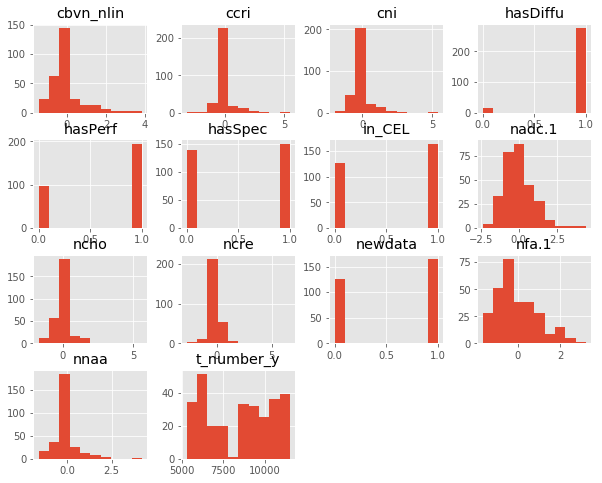

In [33]:
data.hist(figsize=(10,8))

t_number_y        Axes(0.125,0.71587;0.168478x0.16413)
nadc.1         Axes(0.327174,0.71587;0.168478x0.16413)
nfa.1          Axes(0.529348,0.71587;0.168478x0.16413)
cbvn_nlin      Axes(0.731522,0.71587;0.168478x0.16413)
ccri             Axes(0.125,0.518913;0.168478x0.16413)
cni           Axes(0.327174,0.518913;0.168478x0.16413)
ncho          Axes(0.529348,0.518913;0.168478x0.16413)
ncre          Axes(0.731522,0.518913;0.168478x0.16413)
nnaa             Axes(0.125,0.321957;0.168478x0.16413)
newdata       Axes(0.327174,0.321957;0.168478x0.16413)
hasDiffu      Axes(0.529348,0.321957;0.168478x0.16413)
hasPerf       Axes(0.731522,0.321957;0.168478x0.16413)
hasSpec             Axes(0.125,0.125;0.168478x0.16413)
in_CEL           Axes(0.327174,0.125;0.168478x0.16413)
dtype: object

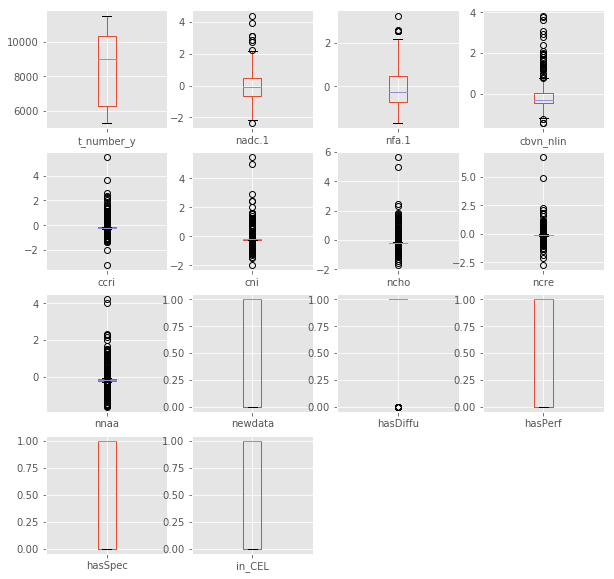

In [34]:
data.plot(kind= 'box' , subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(10, 10))

In [35]:
associations = pd.concat([data,y], axis=1)

In [36]:
associations.outcome_bin.value_counts()

1    222
0     69
Name: outcome_bin, dtype: int64

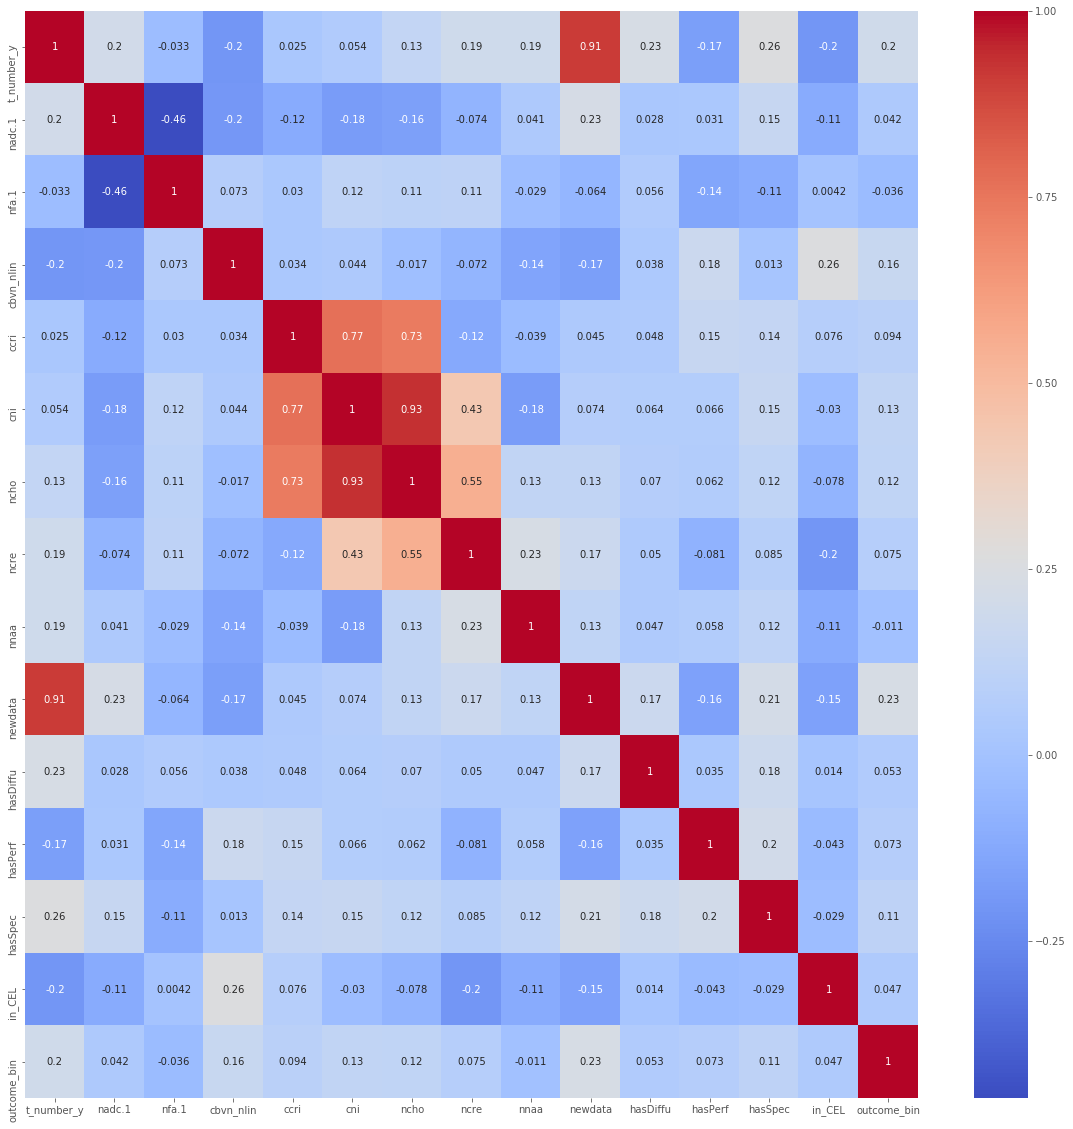

In [37]:
corr = associations[associations.columns].corr()
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(corr, annot = True, cmap='coolwarm')

In [38]:
data_new = data[data['newdata']==1]
associations_new = pd.concat([data_new,y], axis=1)


In [39]:
data_old = data[data['newdata']==0]
associations_old = pd.concat([data_old,y], axis=1)

In [40]:
import scipy.stats


In [41]:
groups = data['t_number_y']

In [42]:
del data['t_number_y'], data['vialid']


In [43]:
print(data.columns)

Index(['nadc.1', 'nfa.1', 'cbvn_nlin', 'ccri', 'cni', 'ncho', 'ncre', 'nnaa',
       'newdata', 'hasDiffu', 'hasPerf', 'hasSpec', 'in_CEL'],
      dtype='object')


## select k best

In [48]:
select_top_4 = SelectKBest(score_func=f_classif, k = 4)
fit = select_top_4.fit(data,y)
features_4 = fit.transform(data)
print(features_4[0:3])
cols_4 = select_top_4.get_support(indices=True)
data.columns[cols_4]

[[-0.31012822 -0.15795128  0.6136407   1.        ]
 [-0.31012822 -0.21733664 -0.17679162  0.        ]
 [-0.31012822 -0.21733664 -0.17679162  0.        ]]


Index(['cbvn_nlin', 'cni', 'ncho', 'newdata'], dtype='object')

In [45]:
# Create and fit selector
selector = SelectKBest(f_classif, k=6)
selector.fit(data, y)
# Get columns to keep
cols = selector.get_support(indices=True)

In [46]:
data.columns[cols]

Index(['cbvn_nlin', 'ccri', 'cni', 'ncho', 'newdata', 'hasSpec'], dtype='object')

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GroupKFold

## modeling

In [48]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [49]:
y.value_counts()

1    222
0     69
Name: outcome_bin, dtype: int64

In [50]:
t_number = groups

In [51]:
## here just looking at averages over all models: 
names = []
accs = []
precisions = []
recalls = []
f1s = []
for name, model in models:
    group_kfold = GroupKFold(n_splits=5)
    group_kfold.get_n_splits(data, y, groups = t_number)
    acc = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='accuracy').mean()
    prec = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='precision').mean()
    rec = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='recall').mean()
    f1 = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='f1').mean()
    names.append(name)
    accs.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
kf_cross_val_means = pd.DataFrame({'Name': names, 'acc': accs, 'prec': precisions, 'rec': recalls, 'f1': f1s})
print(kf_cross_val_means)

  Name       acc        f1      prec       rec
0  KNN  0.708065  0.815760  0.790589  0.849599
1  SVC  0.762653  0.864427  0.762653  1.000000
2   LR  0.752367  0.855820  0.768143  0.969711
3   DT  0.635535  0.752131  0.753916  0.748319
4  GNB  0.549854  0.609574  0.877022  0.480709
5   RF  0.694155  0.797226  0.781353  0.804566
6   GB  0.724898  0.829063  0.767815  0.904905


In [52]:
## here i'm saving all scores for future graphing/exploration
names = []
accs = []
precisions = []
recalls = []
f1s = []
for name, model in models:
    group_kfold = GroupKFold(n_splits=5)
    group_kfold.get_n_splits(data, y, groups = t_number)
    
    acc = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='accuracy')
    prec = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='precision')
    rec = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='recall')
    f1 = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='f1')
    
    names.append(name)
    accs.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
kf_cross_val = pd.DataFrame({'Name': names, 'acc': accs, 'prec': precisions, 'rec': recalls, 'f1': f1s})

In [53]:
models = []
models.append(('LR', LogisticRegression()))


In [56]:
# accs = []
# precisions = []
# recalls = []
# f1s = []
# for name, model in models:
    
#     group_kfold = GroupKFold(n_splits=5)
#     group_kfold.get_n_splits(data, y, groups = t_number)
    
#     acc = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='accuracy')
#     prec = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='precision')
#     rec = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='recall')
#     f1 = cross_val_score(model, data, y, cv=group_kfold, groups = t_number, scoring='f1')
    
#     accs.append(acc)
#     precisions.append(prec)
#     recalls.append(rec)
#     f1s.append(f1)
    
# kf_cross_val = pd.DataFrame({'Name': names, 'acc': accs, 'prec': precisions, 'rec': recalls, 'f1': f1s})

In [57]:
kf_cross_val['acc'][0]

array([ 0.66101695,  0.67241379,  0.63793103,  0.81034483,  0.75862069])

In [58]:
precisions

[array([ 0.83928571,  0.73684211,  0.70175439,  0.80357143,  0.75925926])]

In [59]:
lr_stuff = kf_cross_val.loc[kf_cross_val['Name']=="LR"]

In [60]:
lr_stuff

,Name,acc,f1,prec,rec
2,LR,"[0.813559322034, 0.741379310345, 0.70689655172...","[0.895238095238, 0.848484848485, 0.82474226804...","[0.839285714286, 0.736842105263, 0.70175438596...","[0.959183673469, 1.0, 1.0, 0.978260869565, 0.9..."


In [61]:
array_test = lr_stuff['acc']

In [62]:
array_test = array_test.append(lr_stuff['f1'])

In [63]:
array_test = array_test.append(lr_stuff['prec'])

In [64]:
array_test = array_test.append(lr_stuff['rec'])

In [65]:
array_test = np.array(array_test)

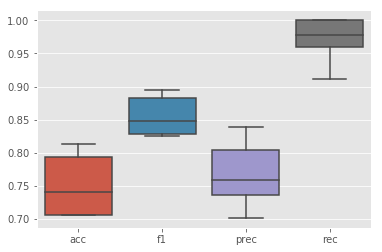

In [67]:
ax = sns.boxplot(data = array_test)
ax.set_xticklabels(['acc', 'f1', 'prec', 'rec'])

## trying model to compare with R

In [72]:
lr_try = LogisticRegression(random_state = 0, solver = 'lbfgs')
                            
                            
                            

In [75]:
lr_fit = lr_try.fit(data, y)
y_pred = lr_fit.predict(data)

In [78]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.42      0.07      0.12        69
          1       0.77      0.97      0.86       222

avg / total       0.69      0.76      0.68       291



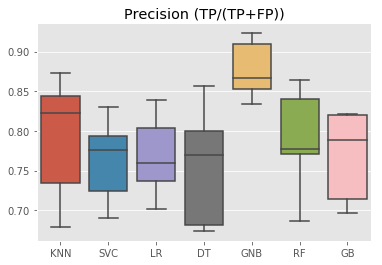

In [54]:
## precision == positive predictive value, (TP/(TP+FP)

ax = sns.boxplot(data=precisions)
ax.set_title('Precision (TP/(TP+FP))')
ax.set_xticklabels(names)

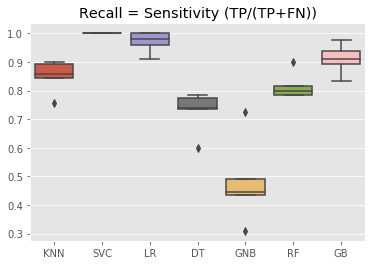

In [55]:
## recall = sensitivity, where 
ax = sns.boxplot(data=recalls)
ax.set_title('Recall = Sensitivity (TP/(TP+FN))')
ax.set_xticklabels(names)

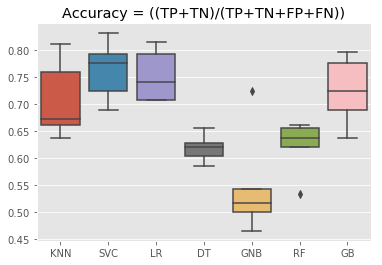

In [56]:
ax = sns.boxplot(data=accs)
ax.set_title('Accuracy = ((TP+TN)/(TP+TN+FP+FN))')
ax.set_xticklabels(names)

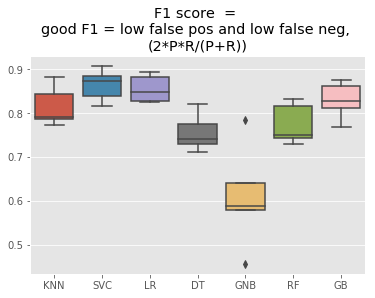

In [57]:
ax = sns.boxplot(data=f1s)
ax.set_title('F1 score  = \ngood F1 = low false pos and low false neg, \n(2*P*R/(P+R))')
ax.set_xticklabels(names)